In [1]:
# load relevant libraries
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score


# load the dataset
df= pd.read_csv('datasets/cosmetic_preprocessed.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    df,  # predictors
    df['rank'],  # target
    test_size=0.3,
    random_state=0)

In [4]:
X_train.shape, X_test.shape

((1030, 17), (442, 17))

In [5]:
y_test=pd.DataFrame(y_test)
y_train=pd.DataFrame(y_train)

numerical_cols=[]
for variables in X_train.columns:
    if X_train[variables].dtype=='int64' or X_train[variables].dtype=='float64':
        numerical_cols.append(variables)
numerical_cols.remove('rank')
numerical_cols


In [7]:
categorical_cols=[]
for variables in X_train.columns:
    if X_train[variables].dtype=='object':
        categorical_cols.append(variables)
        
categorical_cols

['Label', 'brand', 'name', 'ingredients']

Categorical Encoding

In [8]:
df[categorical_cols].nunique()

Label             6
brand           116
name           1472
ingredients    1312
dtype: int64

In [9]:
def find_category_mappings(df, variable, target):
    # grouping dataframe by variables, and get the mean of their target
    # place the average into a list
    return df.groupby([variable])[target].mean().to_dict()


def integer_encode(df, variable, ordinal_mapping):
    # map each variable to their mean target
    df[variable] = df[variable].map(ordinal_mapping)

In [10]:
for variable in categorical_cols:
    mappings = find_category_mappings(X_train, variable, 'rank')
    integer_encode(X_train, variable, mappings)
    integer_encode(X_test, variable, mappings)

In [11]:
# for values that didn't appear in the training set
# set as 0

X_test['brand'].fillna(0, inplace=True)
X_test['name'].fillna(0, inplace=True)

In [12]:
X_train.isnull().sum()

Label          0
brand          0
name           0
price          0
rank           0
ingredients    0
Combination    0
Dry            0
Full           0
Light          0
Matte          0
Medium         0
Natural        0
Normal         0
Oily           0
Radiant        0
Sensitive      0
dtype: int64

Outlier Engineering

In [13]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title(variable+' Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel(' quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title(variable+' Boxplot')

    plt.show()

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


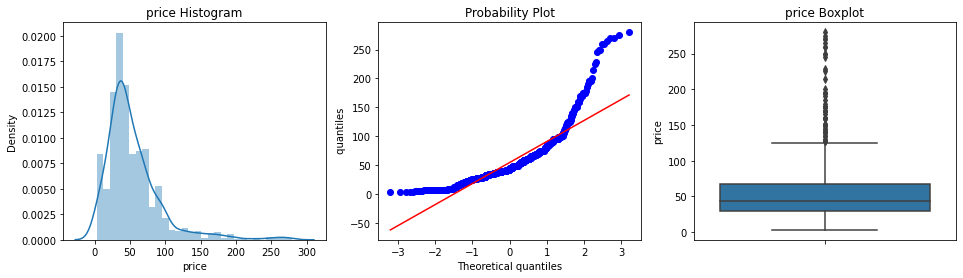

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


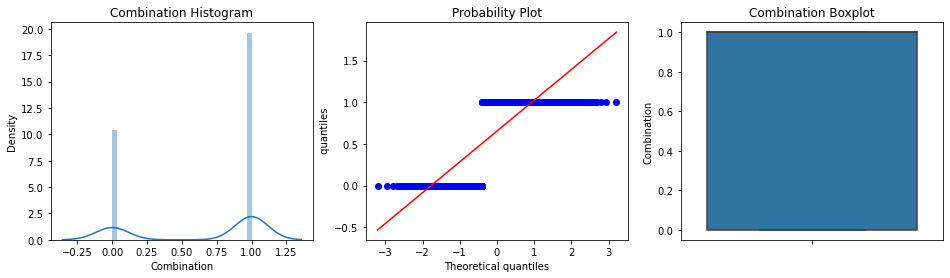

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


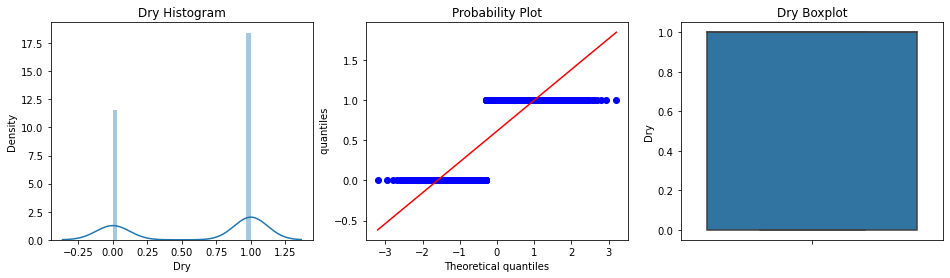

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


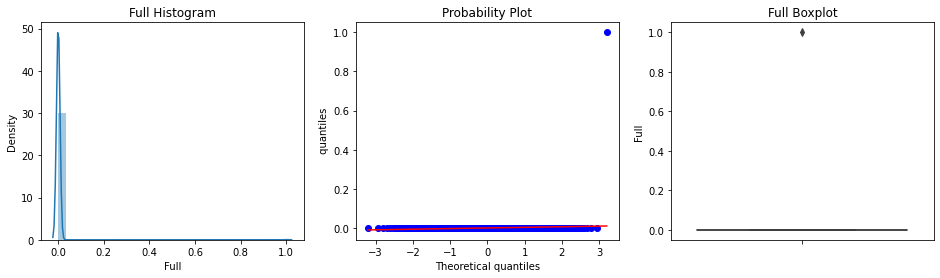

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


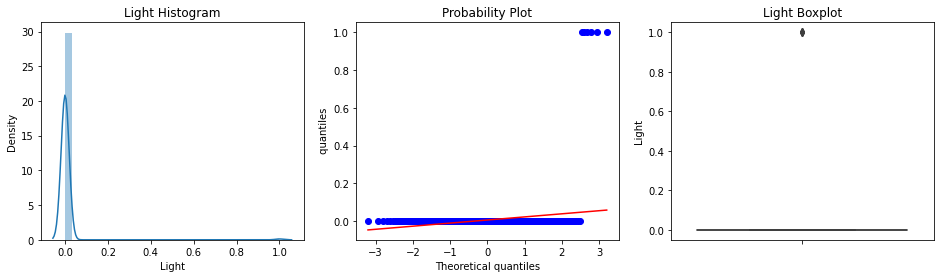

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


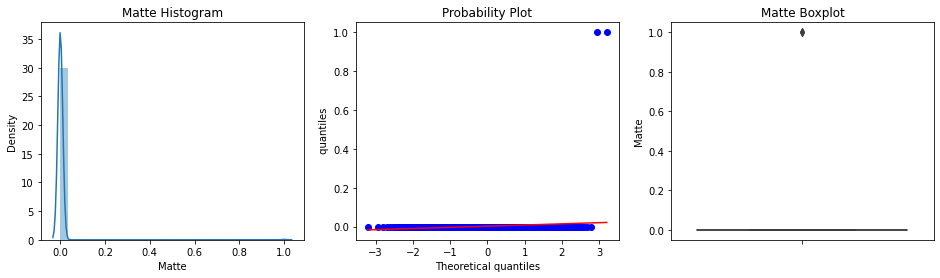

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


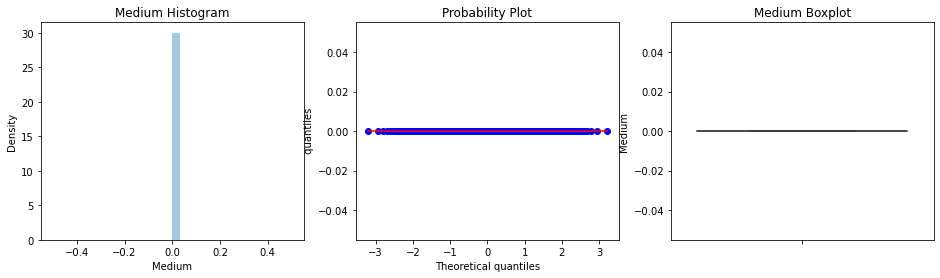

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


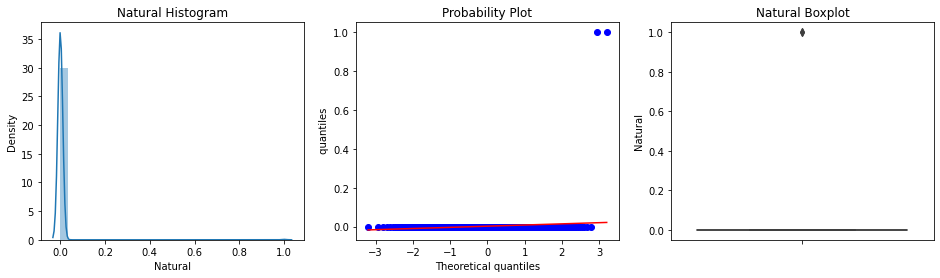

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


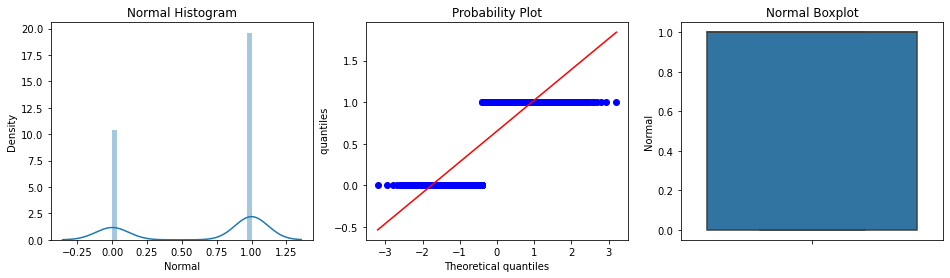

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


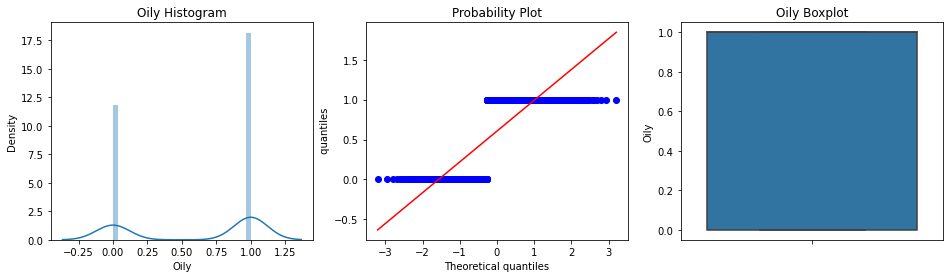

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


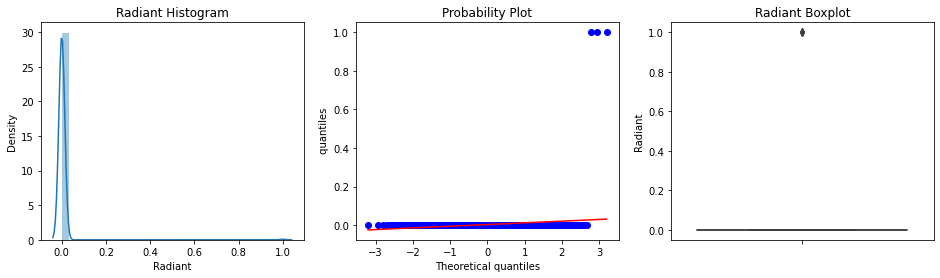

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


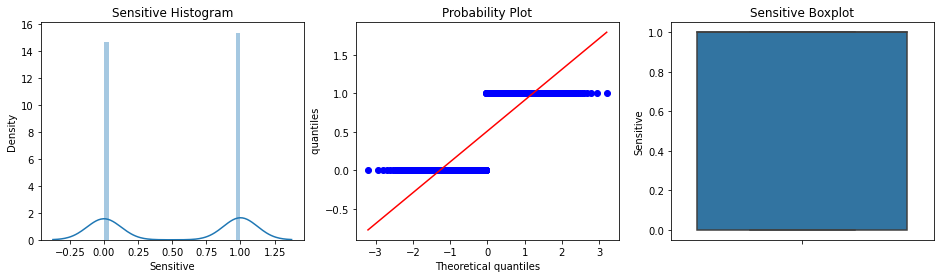

In [14]:
for numerical_column in numerical_cols:
    diagnostic_plots(X_train, numerical_column)

In [15]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [16]:
X_train_trimmed=X_train.copy()
for numerical_column in numerical_cols:
    upper_limit, lower_limit = find_skewed_boundaries(X_train, numerical_column, 1.5)
    
    X_train_trimmed[numerical_column]= np.where(X_train[numerical_column] > upper_limit, upper_limit,
                           np.where(X_train[numerical_column]  < lower_limit, lower_limit, X_train[numerical_column] ))

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


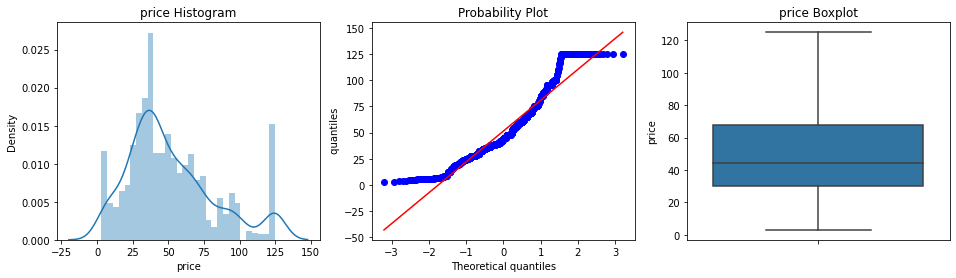

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


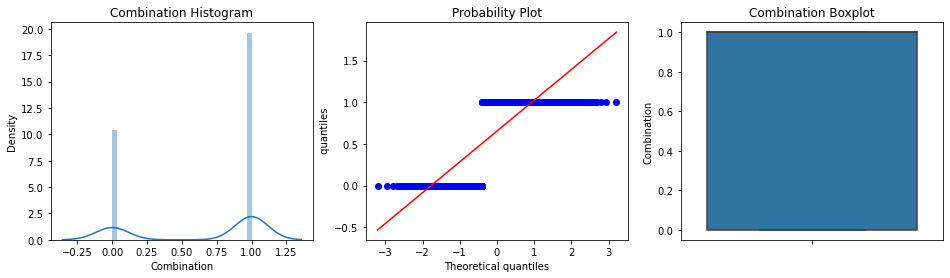

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


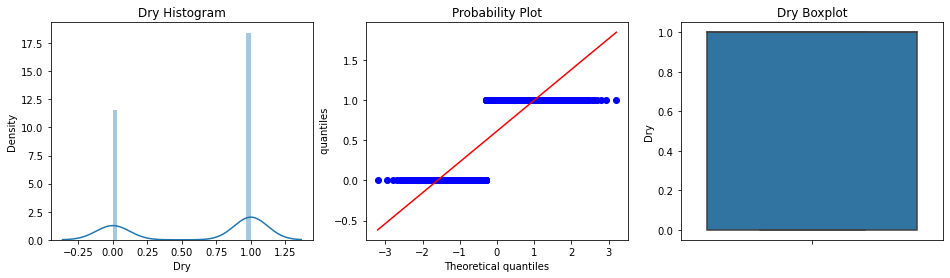

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


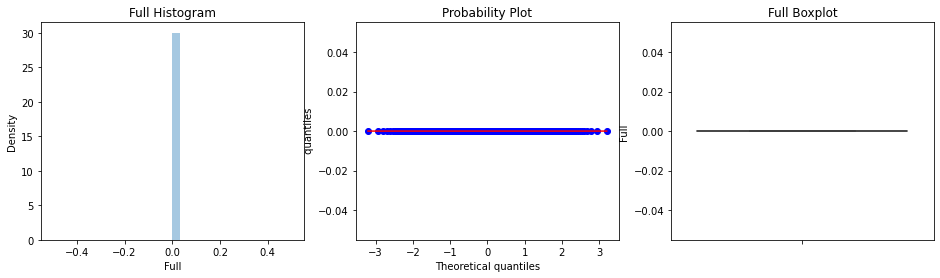

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


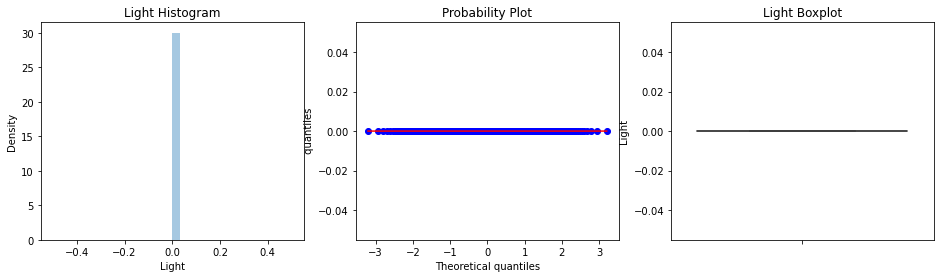

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


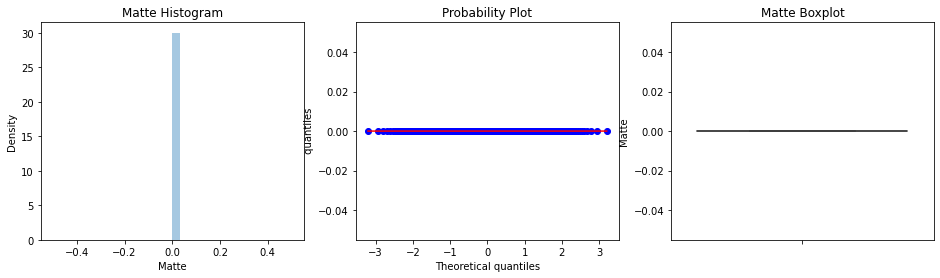

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


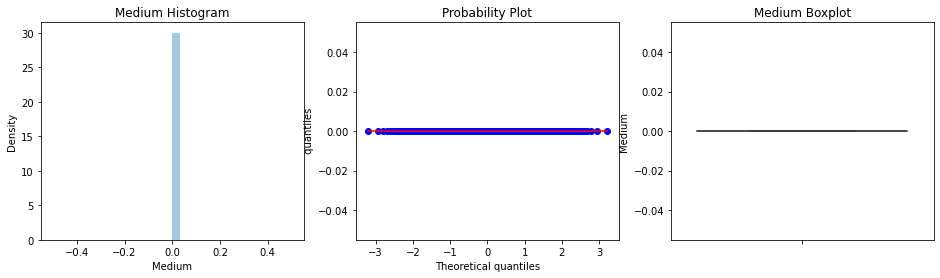

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


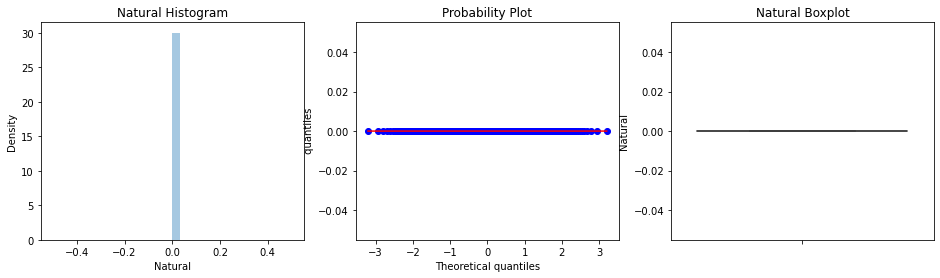

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


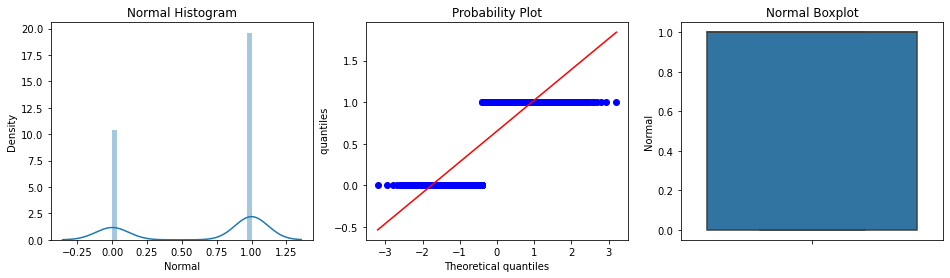

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


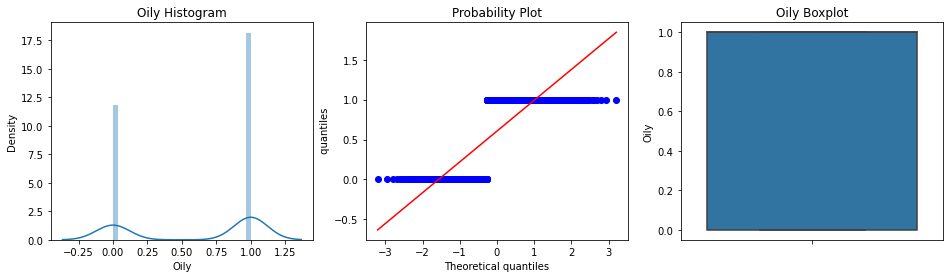

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


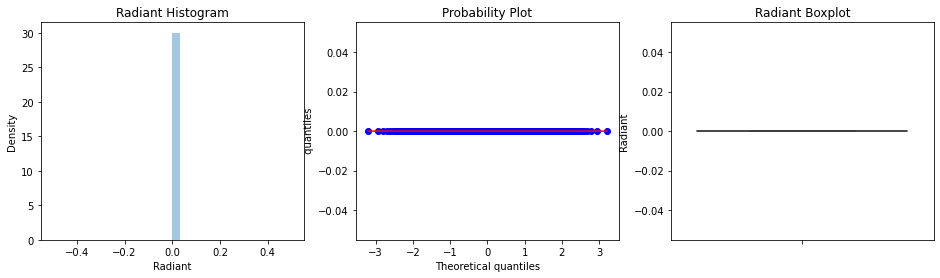

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


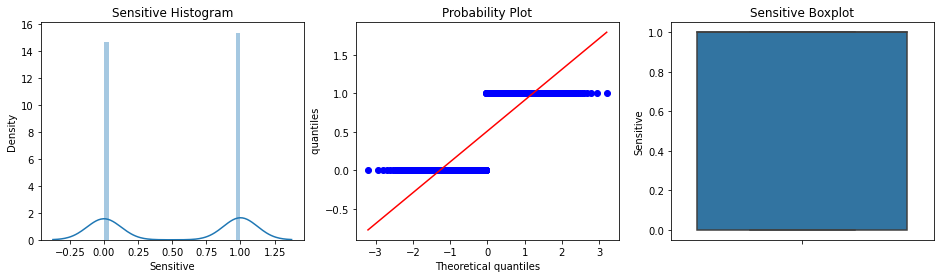

In [17]:
for numerical_column in numerical_cols:
    diagnostic_plots(X_train_trimmed, numerical_column)

 Variable Transformation

In [18]:
def diagnostic_plots(df, variable, name):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.title(variable+name+' Histogram')

    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

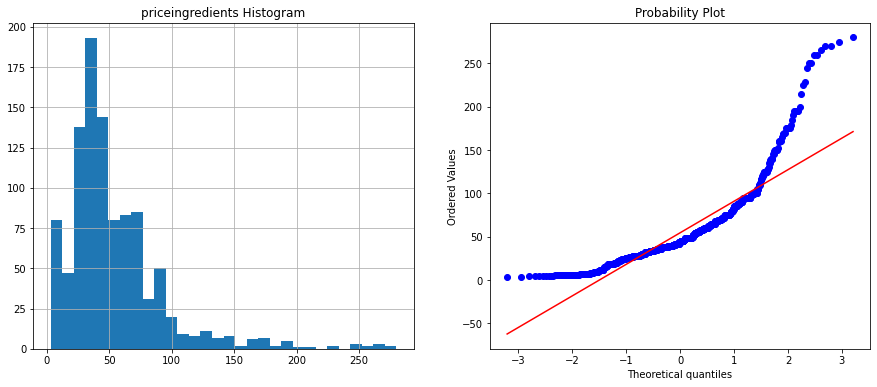

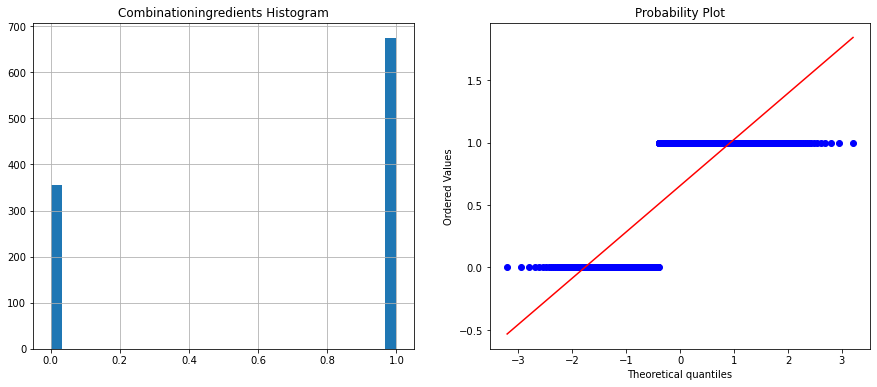

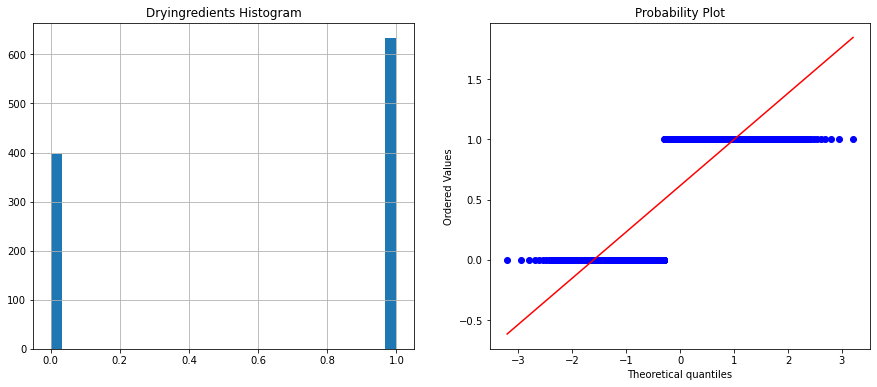

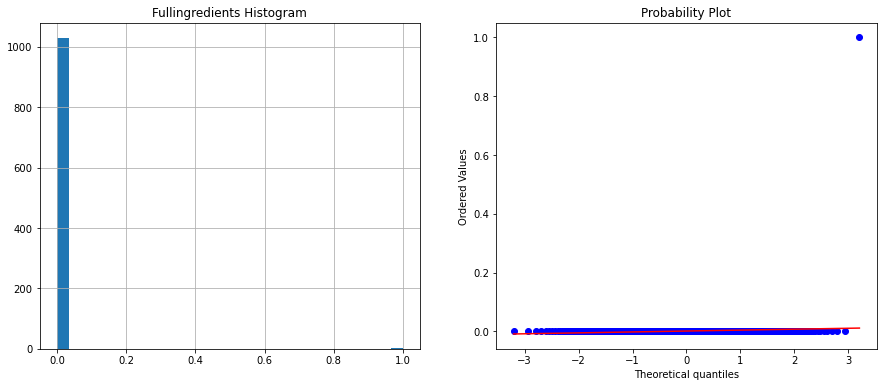

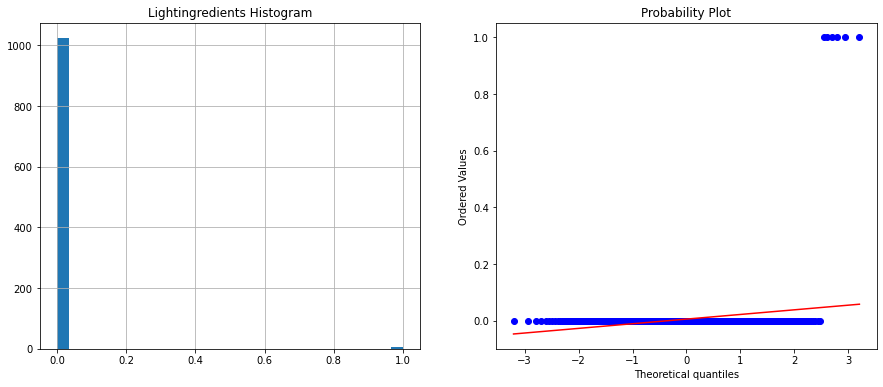

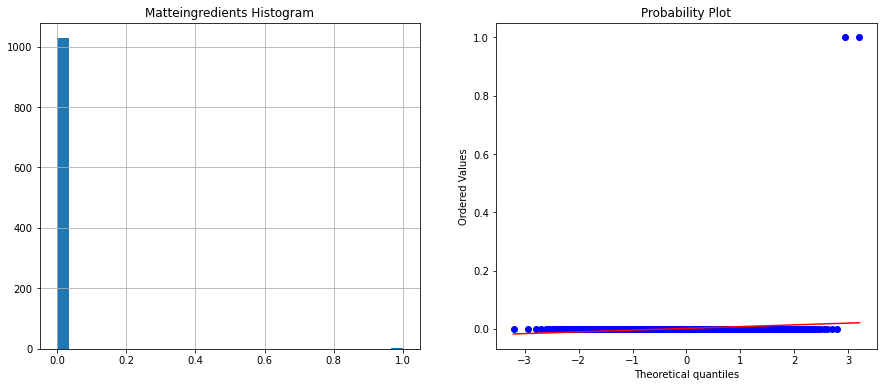

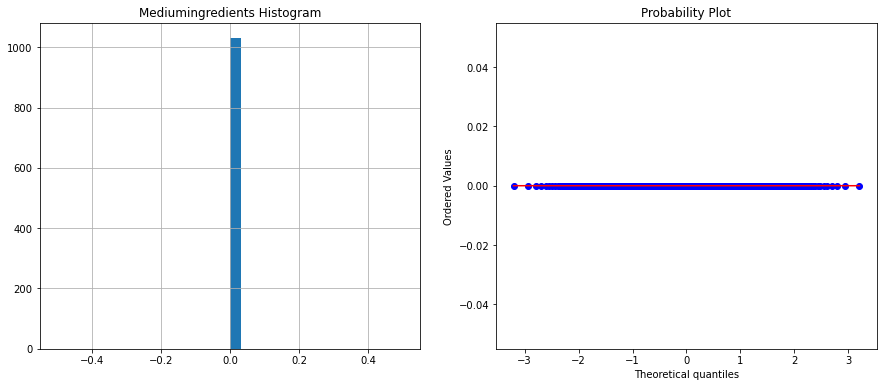

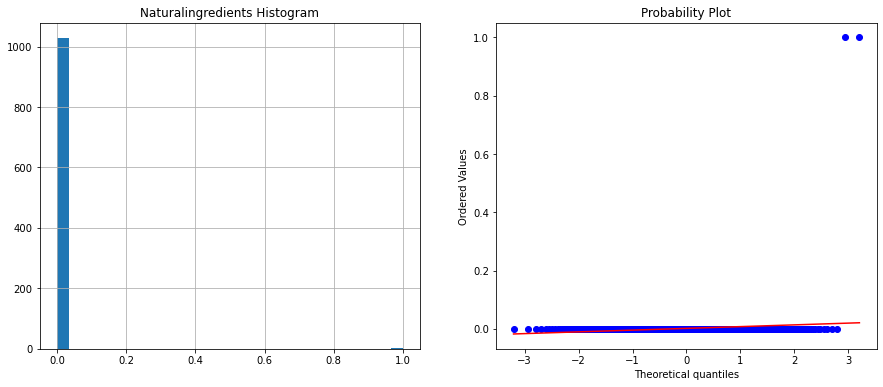

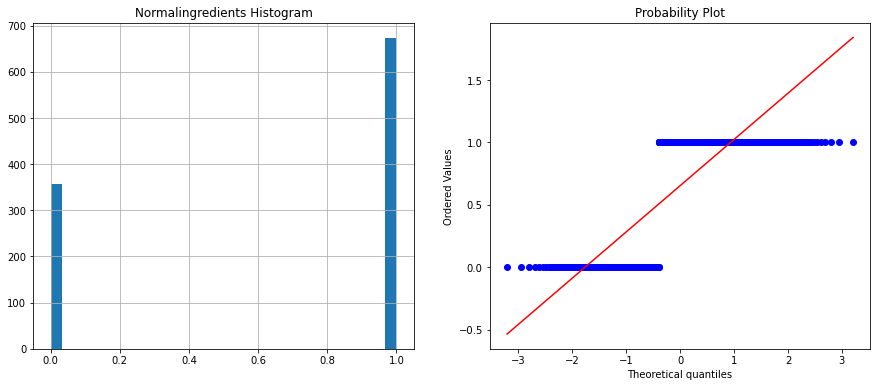

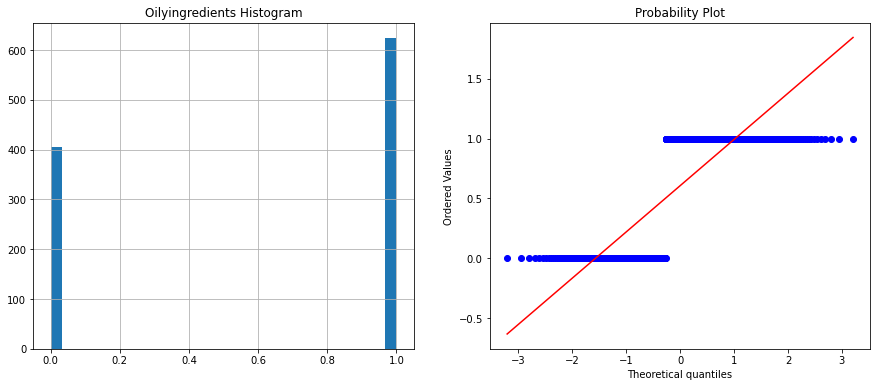

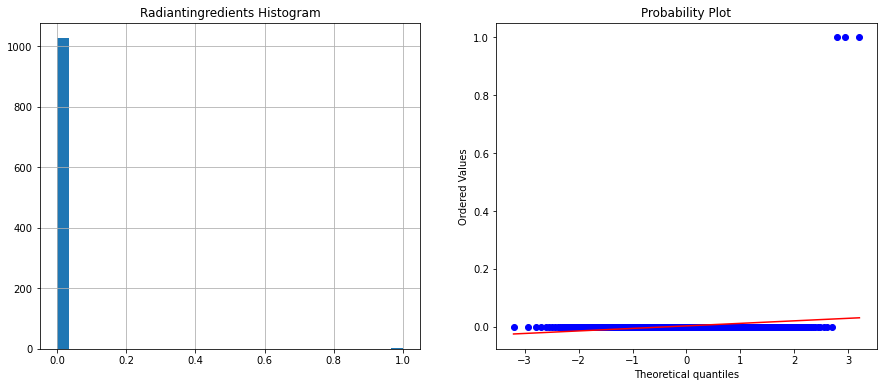

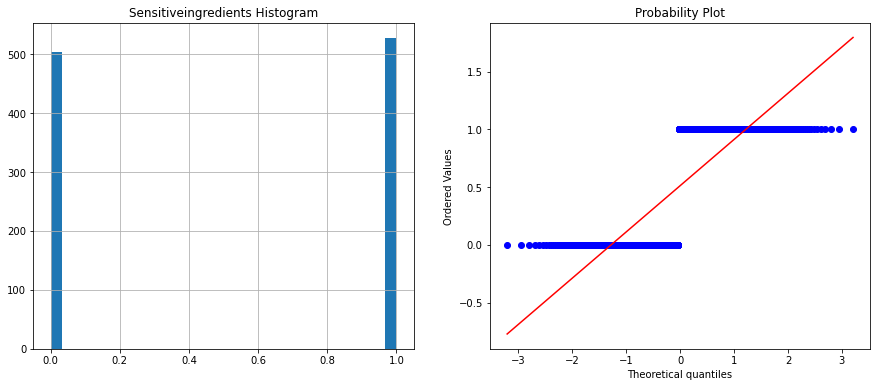

In [19]:
for numerical_column in numerical_cols:
    diagnostic_plots(X_train, numerical_column, 'ingredients')

In [20]:
X_train.head()

,Label,brand,name,price,rank,ingredients,Combination,Dry,Full,Light,Matte,Medium,Natural,Normal,Oily,Radiant,Sensitive
445,4.316754,4.170455,4.5,60,4.5,4.020000,0,0,0,0,0,0,0,0,0,0,0
536,4.316754,4.090323,4.3,38,4.3,4.300000,0,0,0,0,0,0,0,0,0,0,0
898,4.131088,4.109375,4.1,12,4.1,4.200000,1,1,0,0,0,0,0,1,1,0,1
1320,4.077119,4.066667,3.7,38,3.7,3.700000,1,1,0,0,0,0,0,1,1,0,1
283,4.228837,4.444444,3.9,95,3.9,4.533333,1,1,0,0,0,0,0,1,1,0,1


In [21]:
def log_transformer(df, column):
    # create a log transformer
    transformer = FunctionTransformer(np.log, validate=True)
    data_t = transformer.transform(df[column].values.reshape(-1, 1))
    data_t = pd.DataFrame(data_t, columns = [column])
    diagnostic_plots(data_t, column, ' log transfomer ')

In [23]:
def reciprocal_transformer(df, column):
    # create a reciprocal transformer
    transformer = FunctionTransformer(lambda x: 1/x, validate=True)
    data_t = transformer.transform(df[column].values.reshape(-1, 1))
    data_t = pd.DataFrame(data_t, columns = [column])
    diagnostic_plots(data_t, column, ' reciprocal transfomer ')

In [24]:
def sqrt_transformer(df, column):
    # create a sqrt transformer
    transformer = FunctionTransformer(lambda x: x**(1/2), validate=True)
    data_t = transformer.transform(df[column].values.reshape(-1, 1))
    data_t = pd.DataFrame(data_t, columns = [column])
    diagnostic_plots(data_t, column, ' sqrt transfomer ')

In [25]:
def exp_transformer(df, column):
    # create an exponential transformer
    transformer = FunctionTransformer(lambda x: x**(1/1.2), validate=True)
    data_t = transformer.transform(df[column].values.reshape(-1, 1))
    data_t = pd.DataFrame(data_t, columns = [column])
    diagnostic_plots(data_t, column, ' exponential transfomer ')

In [26]:
def box_cox_transformer(df, column):
    # create a box-cox transformer
    transformer = PowerTransformer(method='box-cox', standardize=False)
    # find the optimal lambda using the train set
    transformer.fit(df[column].values.reshape(-1, 1))
    data_t = transformer.transform(df[column].values.reshape(-1, 1))
    data_t = pd.DataFrame(data_t, columns = [column])
    diagnostic_plots(data_t, column, ' box-cox transfomer ')

In [27]:
def yeo_johnson_transformer(df, column):
    # create a yeo-johnson
    transformer = PowerTransformer(method='yeo-johnson', standardize=False)
    # learn the lambda from the train set
    transformer.fit(df[column].values.reshape(-1, 1))
    data_t = transformer.transform(df[column].values.reshape(-1, 1))
    data_t = pd.DataFrame(data_t, columns = [column])
    diagnostic_plots(data_t, column, ' yeo-johnson transfomer ')

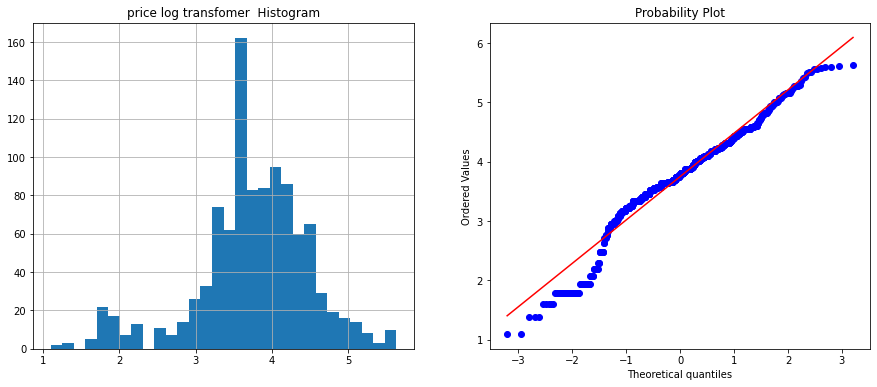

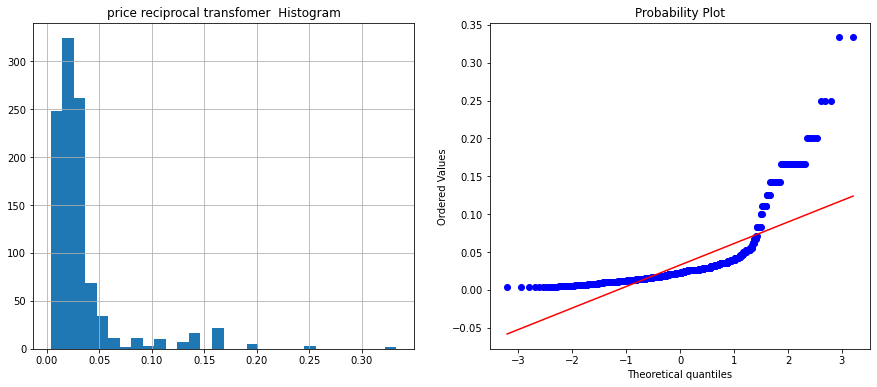

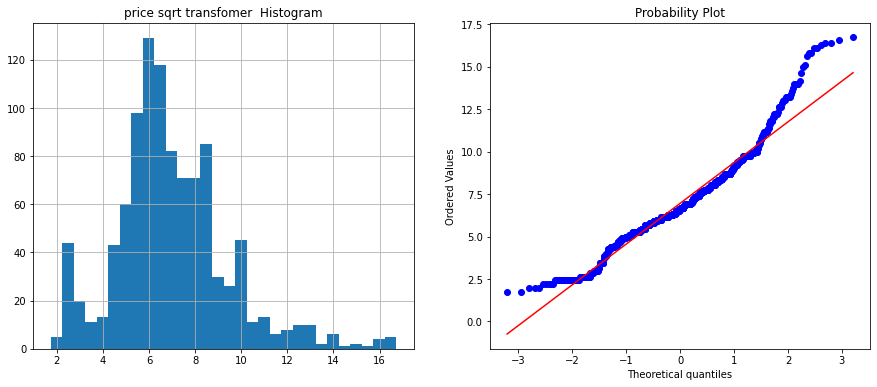

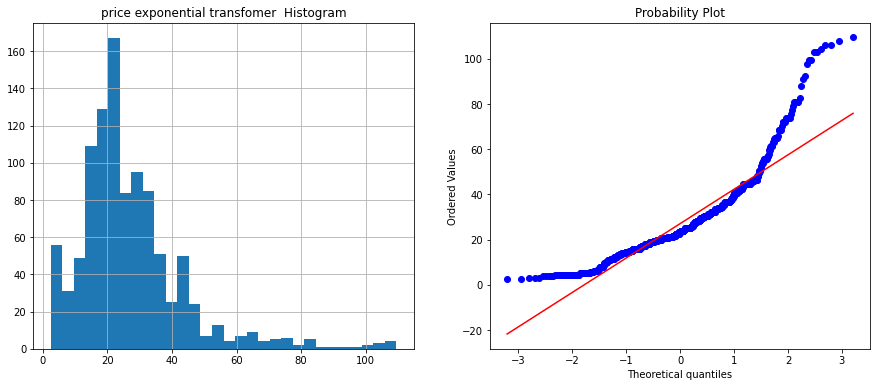

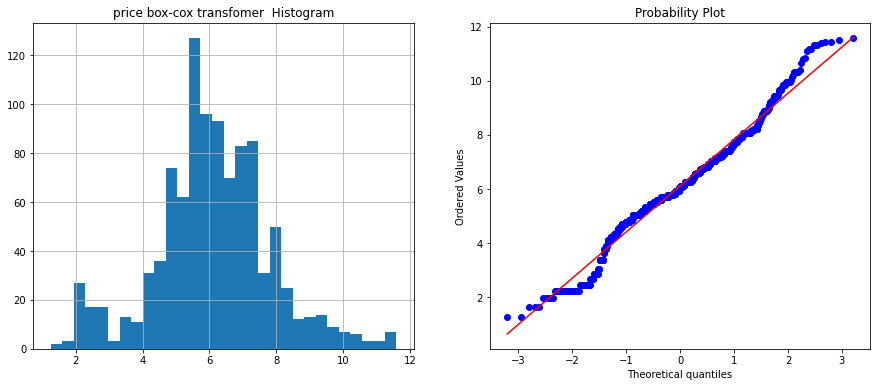

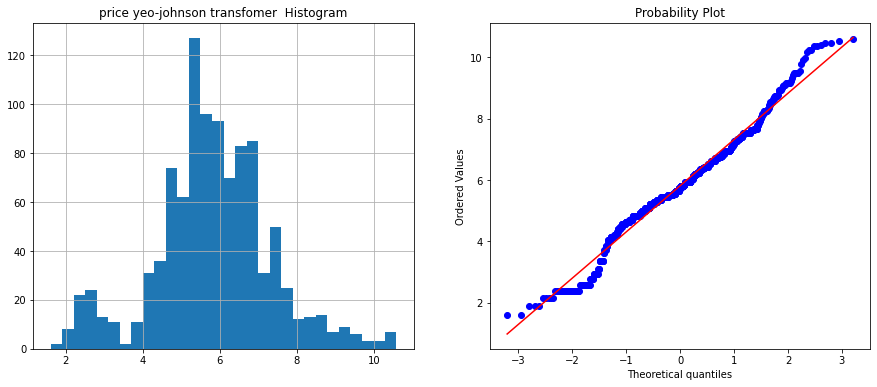

In [28]:
log_transformer(X_train,'price')
reciprocal_transformer(X_train,'price')
sqrt_transformer(X_train,'price')
exp_transformer(X_train,'price')
box_cox_transformer(X_train,'price')
yeo_johnson_transformer(X_train,'price')

In [29]:
def log_transformer_2(df, column):
    # create a log transformer
    transformer = FunctionTransformer(np.log, validate=True)
    df[column] = transformer.transform(df[column].values.reshape(-1, 1))
    diagnostic_plots(df, column, ' log transfomer ')

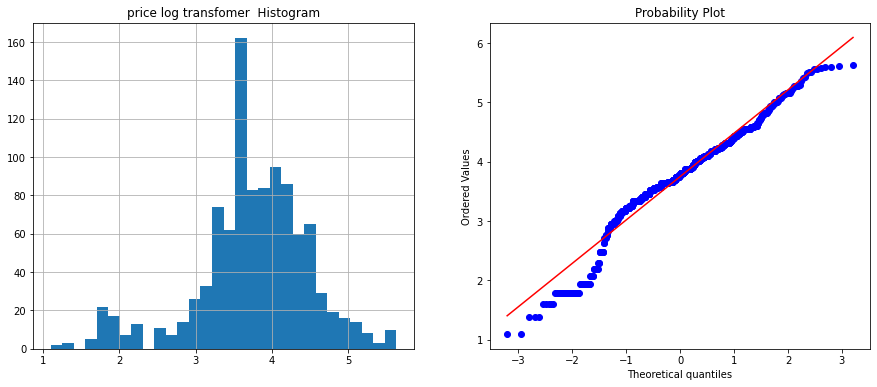

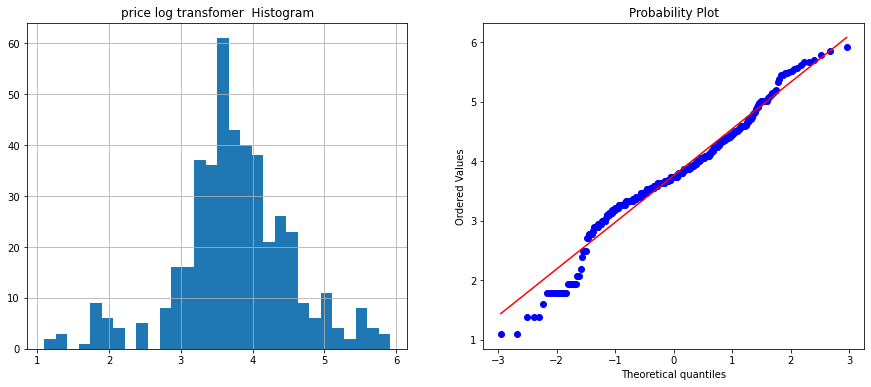

In [30]:
log_transformer_2(X_train, 'price')
log_transformer_2(X_test, 'price')

In [31]:
# # Equal width discretisation
for numerical_column in numerical_cols:
     numerical_range=X_train[numerical_column].max() - X_train[numerical_column].min()
     min_value = int(np.floor( X_train[numerical_column].min()))
     max_value = int(np.ceil( X_train[numerical_column].max()))
     inter_value = int(np.round(numerical_range / 10))
     if inter_value==0:
         inter_value=1
     intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
     labels = ['Bin_' + str(i) for i in range(1, len(intervals))]
    
     X_train[numerical_column+'_ew_disc_labels'] = pd.cut(x=X_train[numerical_column],
                                     bins=intervals,
                                     labels=labels,
                                     include_lowest=True)

#     # and one with bin boundaries
     X_train[numerical_column+'_ew_disc'] = pd.cut(x=X_train[numerical_column],
                                  bins=intervals,
                                  include_lowest=True)

In [32]:
X_train.head(10)

,Label,brand,name,price,rank,ingredients,Combination,Dry,Full,Light,...,Natural_ew_disc_labels,Natural_ew_disc,Normal_ew_disc_labels,Normal_ew_disc,Oily_ew_disc_labels,Oily_ew_disc,Radiant_ew_disc_labels,Radiant_ew_disc,Sensitive_ew_disc_labels,Sensitive_ew_disc
445,4.316754,4.170455,4.5,4.094345,4.5,4.020000,0,0,0,0,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
536,4.316754,4.090323,4.3,3.637586,4.3,4.300000,0,0,0,0,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
898,4.131088,4.109375,4.1,2.484907,4.1,4.200000,1,1,0,0,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
1320,4.077119,4.066667,3.7,3.637586,3.7,3.700000,1,1,0,0,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
283,4.228837,4.444444,3.9,4.553877,3.9,4.533333,1,1,0,0,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
1102,3.733571,4.148649,4.0,3.465736,4.0,4.000000,1,1,0,0,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
824,4.210405,4.126786,3.6,2.890372,3.6,3.600000,0,0,0,0,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
399,4.316754,4.252174,4.5,3.258097,4.5,4.500000,0,0,0,0,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
1013,4.131088,3.879167,4.6,3.850148,4.6,4.600000,0,0,0,0,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
406,4.316754,4.170455,4.7,1.945910,4.7,4.405882,0,0,0,0,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"


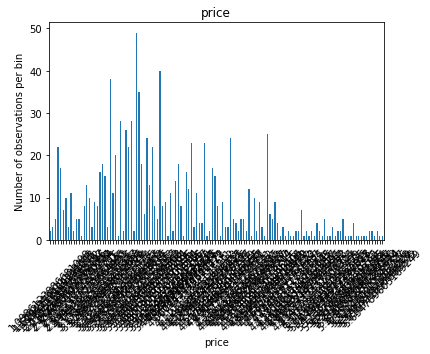

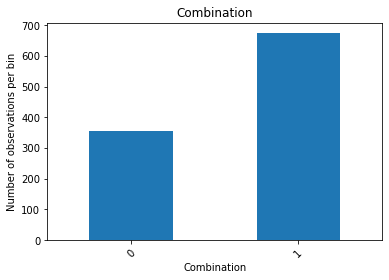

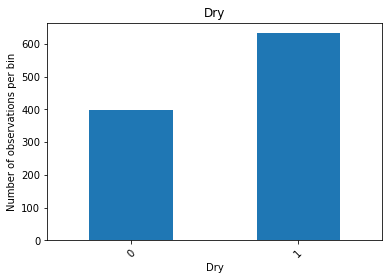

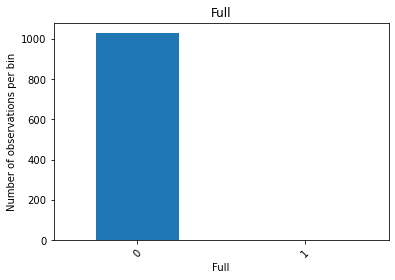

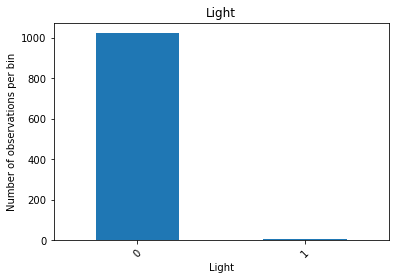

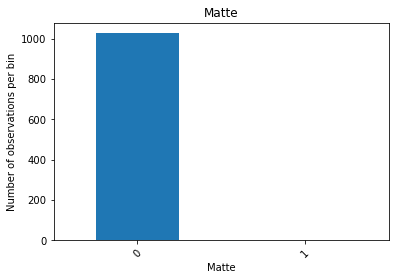

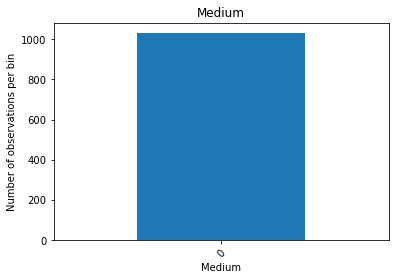

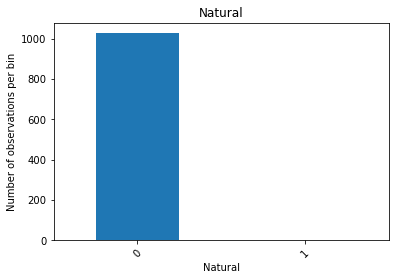

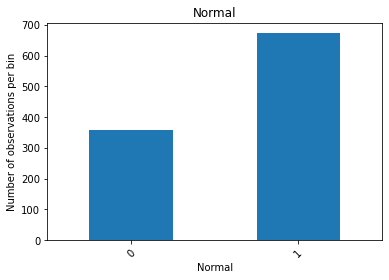

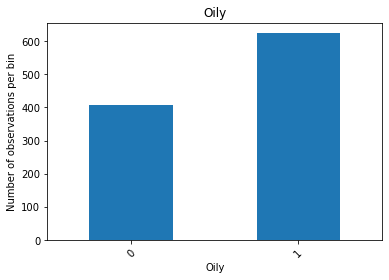

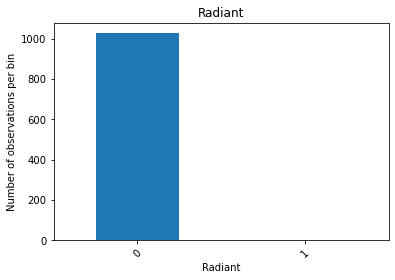

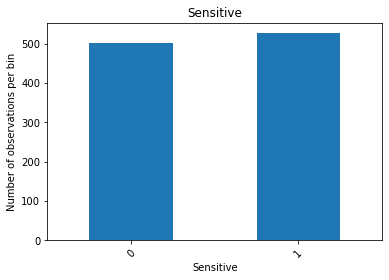

In [34]:
for numerical_column in numerical_cols:
     plt.figure(figsize=(6,4))
     fig=X_train.groupby(numerical_column)[numerical_column].count().plot.bar()
     plt.xticks(rotation=45)
     plt.ylabel('Number of observations per bin')
     plt.title(numerical_column)

In [35]:
# # Equal frequency discretisation
from sklearn.preprocessing import KBinsDiscretizer

In [36]:
X_train.head()

,Label,brand,name,price,rank,ingredients,Combination,Dry,Full,Light,...,Natural_ew_disc_labels,Natural_ew_disc,Normal_ew_disc_labels,Normal_ew_disc,Oily_ew_disc_labels,Oily_ew_disc,Radiant_ew_disc_labels,Radiant_ew_disc,Sensitive_ew_disc_labels,Sensitive_ew_disc
445,4.316754,4.170455,4.5,4.094345,4.5,4.020000,0,0,0,0,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
536,4.316754,4.090323,4.3,3.637586,4.3,4.300000,0,0,0,0,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
898,4.131088,4.109375,4.1,2.484907,4.1,4.200000,1,1,0,0,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
1320,4.077119,4.066667,3.7,3.637586,3.7,3.700000,1,1,0,0,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
283,4.228837,4.444444,3.9,4.553877,3.9,4.533333,1,1,0,0,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"


In [37]:
labels = ['Q'+str(i) for i in range(1,10)]

In [45]:
X_train=X_train.drop(columns='rank')
X_test=X_test.drop(columns='rank')

In [46]:
numerical_cols=[]
for variables in X_train.columns:
    if X_train[variables].dtype=='int64' or X_train[variables].dtype=='float64':
        numerical_cols.append(variables)

numerical_cols

['Label',
 'brand',
 'name',
 'price',
 'ingredients',
 'Combination',
 'Dry',
 'Full',
 'Light',
 'Matte',
 'Medium',
 'Natural',
 'Normal',
 'Oily',
 'Radiant',
 'Sensitive']

In [47]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train[numerical_cols])

# transform train set and test set

X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [48]:
np.round(X_train.describe(), 1)

,Label,brand,name,price,ingredients,Combination,Dry,Full,Light,Matte,Medium,Natural,Normal,Oily,Radiant,Sensitive
count,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0
mean,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
min,-2.3,-7.5,-6.3,-3.6,-6.7,-1.4,-1.3,-0.0,-0.1,-0.0,0.0,-0.0,-1.4,-1.2,-0.1,-1.0
25%,-0.3,-0.3,-0.2,-0.5,-0.2,-1.4,-1.3,-0.0,-0.1,-0.0,0.0,-0.0,-1.4,-1.2,-0.1,-1.0
50%,0.4,0.1,0.1,0.0,0.1,0.7,0.8,-0.0,-0.1,-0.0,0.0,-0.0,0.7,0.8,-0.1,1.0
75%,0.5,0.5,0.6,0.6,0.5,0.7,0.8,-0.0,-0.1,-0.0,0.0,-0.0,0.7,0.8,-0.1,1.0
max,1.0,3.7,1.3,2.5,1.4,0.7,0.8,32.1,13.1,22.7,0.0,22.7,0.7,0.8,18.5,1.0


In [49]:
X_train.head()

,Label,brand,name,price,ingredients,Combination,Dry,Full,Light,Matte,...,Natural_ew_disc_labels,Natural_ew_disc,Normal_ew_disc_labels,Normal_ew_disc,Oily_ew_disc_labels,Oily_ew_disc,Radiant_ew_disc_labels,Radiant_ew_disc,Sensitive_ew_disc_labels,Sensitive_ew_disc
445,1.006290,0.135888,0.552380,0.460459,-0.191542,-1.375957,-1.262719,-0.031174,-0.076547,-0.044108,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
536,1.006290,-0.210614,0.246328,-0.152035,0.259035,-1.375957,-1.262719,-0.031174,-0.076547,-0.044108,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
898,-0.044963,-0.128228,-0.059725,-1.697731,0.098114,0.726767,0.791942,-0.031174,-0.076547,-0.044108,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
1320,-0.350541,-0.312905,-0.671830,-0.152035,-0.706487,0.726767,0.791942,-0.031174,-0.076547,-0.044108,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"
283,0.508499,1.320658,-0.365777,1.076673,0.634515,0.726767,0.791942,-0.031174,-0.076547,-0.044108,...,Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]",Bin_1,"(-0.001, 1.0]"


In [51]:
X_train.to_csv('X_train', index=False)
X_test.to_csv('X_test',index=False)
y_train.to_csv('y_train',index=False)
y_test.to_csv('y_test',index=False)

In [52]:
X_train.shape, X_test.shape

((1030, 40), (442, 16))

In [53]:
X_test.head()

,Label,brand,name,price,ingredients,Combination,Dry,Full,Light,Matte,Medium,Natural,Normal,Oily,Radiant,Sensitive
1076,-0.044963,-0.052942,-6.333799,-0.768249,NaN,0.726767,0.791942,-0.031174,-0.076547,-0.044108,0.0,-0.044108,0.728327,0.806623,-0.054047,-1.023579
655,0.404133,0.325420,-6.333799,1.689168,NaN,0.726767,0.791942,-0.031174,-0.076547,-0.044108,0.0,-0.044108,0.728327,0.806623,-0.054047,0.976964
554,1.006290,0.757833,-6.333799,-0.382479,NaN,0.726767,0.791942,-0.031174,-0.076547,-0.044108,0.0,-0.044108,0.728327,0.806623,-0.054047,0.976964
568,1.006290,0.362484,-6.333799,-0.884928,NaN,0.726767,-1.262719,-0.031174,-0.076547,-0.044108,0.0,-0.044108,-1.373009,0.806623,-0.054047,-1.023579
390,1.006290,-0.052942,-6.333799,-1.311961,NaN,-1.375957,-1.262719,-0.031174,-0.076547,-0.044108,0.0,-0.044108,-1.373009,-1.239736,-0.054047,-1.023579


In [54]:
X_train.isnull().mean().sort_values(ascending=True)

Label                         0.0
Dry_ew_disc                   0.0
Full_ew_disc_labels           0.0
Full_ew_disc                  0.0
Light_ew_disc_labels          0.0
Light_ew_disc                 0.0
Matte_ew_disc_labels          0.0
Matte_ew_disc                 0.0
Natural_ew_disc_labels        0.0
Natural_ew_disc               0.0
Normal_ew_disc_labels         0.0
Normal_ew_disc                0.0
Oily_ew_disc_labels           0.0
Oily_ew_disc                  0.0
Radiant_ew_disc_labels        0.0
Radiant_ew_disc               0.0
Dry_ew_disc_labels            0.0
Sensitive_ew_disc_labels      0.0
Combination_ew_disc           0.0
price_ew_disc                 0.0
brand                         0.0
name                          0.0
price                         0.0
ingredients                   0.0
Combination                   0.0
Dry                           0.0
Full                          0.0
Light                         0.0
Combination_ew_disc_labels    0.0
Sensitive_ew_d

In [55]:
X_test.isnull().mean().sort_values(ascending=True)

Label          0.000000
brand          0.000000
name           0.000000
price          0.000000
Combination    0.000000
Dry            0.000000
Full           0.000000
Light          0.000000
Matte          0.000000
Medium         0.000000
Natural        0.000000
Normal         0.000000
Oily           0.000000
Radiant        0.000000
Sensitive      0.000000
ingredients    0.861991
dtype: float64

In [56]:
y_test.isna().mean().sort_values(ascending=True)

rank    0.0
dtype: float64